In [23]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from random import randint as rnd
import cProfile
import timeit
import statistics as st
import functools

In [24]:
def version_1():
    a = rnd(-10, 10)
    b = rnd(-10, 10)
    c = rnd(-10, 10)
    if a > b:
        if b > c:
            return f'Среднее число: {b}'
        else:
            if a > c:
                return f'Среднее число: {c}'
            else:
                return f'Среднее число: {a}'
    else:
        if c > b:
            return f'Среднее число: {b}'
        else:
            if a > c:
                return f'Среднее число: {a}'
            else:
                return f'Среднее число: {c}'


def version_2():
    a = rnd(-10, 10)
    b = rnd(-10, 10)
    c = rnd(-10, 10)

    if a > b > c or a < b < c:
        return f'Среднее число: {b}'
    elif b > c > a or b < c < a:
        return f'Среднее число: {c}'
    elif c > a > b or c < a < b:
        return f'Среднее число: {a}'


def version_3():
    from statistics import median
    a = rnd(-10, 10)
    b = rnd(-10, 10)
    c = rnd(-10, 10)
    return median([a, b, c])


def version_4():
    a = rnd(-10, 10)
    b = rnd(-10, 10)
    c = rnd(-10, 10)
    lst = [a, b, c]
    lst.sort()
    return lst[1]


@functools.lru_cache()
def version_5():
    a = rnd(-10, 10)
    b = rnd(-10, 10)
    c = rnd(-10, 10)
    lst = [a, b, c]
    lst.sort()
    return lst[1]

Прежде запускаем 1 версию кода - изначальную, в которой проверялась каждая переменная в отдельности и посмотрим на результат.

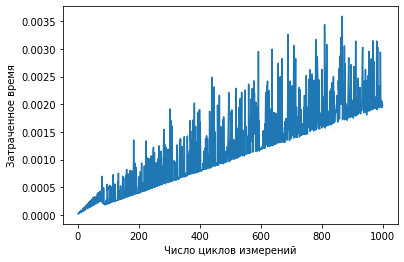

Среднее время : 0.0012426172172233343


In [26]:
x = []
y = []
    
for i in range(1, 1000):    
    clear_output(wait=True)    
    x += [i]
    y += [timeit.timeit(stmt='version_1()', number=i, globals=globals())]
    plt.plot(x, y)
    plt.xlabel('Число циклов измерений')
    plt.ylabel('Затраченное время')
    plt.show()
print(f'Среднее время : {st.mean(y)}')

Как мы видим при увеличении колличества операций пропорционально увеличивается и затрачиваемое время. При этом отмечается значительный разброс между результатам, который также увеличивается при увеличении результатов.

Версия 2: заменяем проход по каждой отдельной переменной и добавляем 'or'.

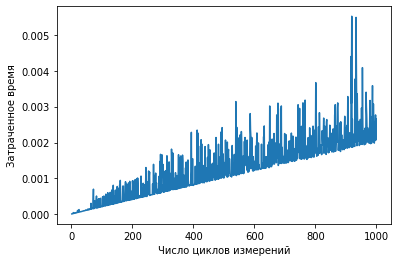

Среднее время : 0.001294224124117969


In [27]:
x = []
y = []
    
for i in range(1, 1000):    
    clear_output(wait=True)    
    x += [i]
    y += [timeit.timeit(stmt='version_2()', number=i, globals=globals())]
    plt.plot(x, y)
    plt.xlabel('Число циклов измерений')
    plt.ylabel('Затраченное время')
    plt.show()
print(f'Среднее время : {st.mean(y)}')

Как можно отметить несколько снизился разброс в начале тестирования, однако потеряли во времени.

Версия 3: воспользуемся модулем 'statistics' и определим медиану передаваемого списка.

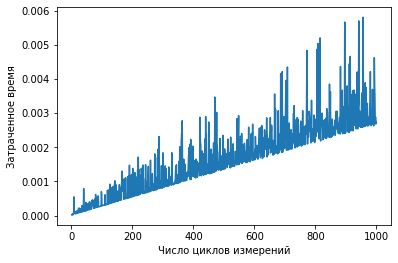

Среднее время : 0.001684736936939233


In [28]:
x = []
y = []
    
for i in range(1, 1000):    
    clear_output(wait=True)    
    x += [i]
    y += [timeit.timeit(stmt='version_3()', number=i, globals=globals())]
    plt.plot(x, y)
    plt.xlabel('Число циклов измерений')
    plt.ylabel('Затраченное время')
    plt.show()
print(f'Среднее время : {st.mean(y)}')

Время на импорт модуля тратит больше времени чем использование встроенных функций

Версия 4: отсортируем список и так как у нас всего 3 элемента возьмем элемент с индексом 1

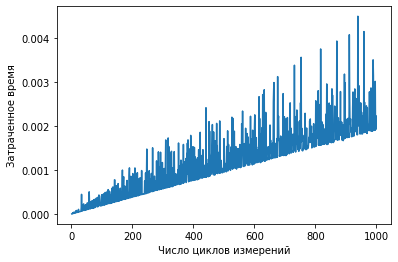

Среднее время : 0.0012089470470476448


In [29]:
x = []
y = []
    
for i in range(1, 1000):    
    clear_output(wait=True)    
    x += [i]
    y += [timeit.timeit(stmt='version_4()', number=i, globals=globals())]
    plt.plot(x, y)
    plt.xlabel('Число циклов измерений')
    plt.ylabel('Затраченное время')
    plt.show()
print(f'Среднее время : {st.mean(y)}')

Получилось добиться наилучшего результата

Версия 5: воспользуемся декоратором @lru_cache() модуля functools, который оборачивает функцию с переданными в нее аргументами и запоминает возвращаемый результат соответствующий этим аргументам.

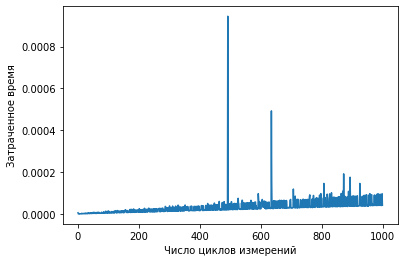

Среднее время : 3.509949950064772e-05


In [30]:
x = []
y = []
    
for i in range(1, 1000):    
    clear_output(wait=True)    
    x += [i]
    y += [timeit.timeit(stmt='version_5()', number=i, globals=globals())]
    plt.plot(x, y)
    plt.xlabel('Число циклов измерений')
    plt.ylabel('Затраченное время')
    plt.show()
print(f'Среднее время : {st.mean(y)}')

Результат: значительное ускорение кода